## Assignment: Clustering Assignment

## Problem Statement :
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

## Objectives of Assignment :
The requisite is:
- To categorise the countries using some socio-economic and health factors that determine the overall development of the country. 
- To suggest the countries which the CEO needs to focus on the most.

### Importing Required Libraries:

In [1]:
# import all libraries and dependencies for dataframeimport matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500) 

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

### Step 1: Reading and Understanding the Data

In [2]:
# Reading the file on which analysis needs to be done
df_country=pd.read_csv(r"C:\Users\kaash\Downloads\Clustering Technique\Country-data.csv")
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Reading the data dictionary file
df_dictionary=pd.read_csv(r"C:\Users\kaash\Downloads\Clustering Technique\data-dictionary+.csv")
df_dictionary.head(15)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [4]:
#determing the basic statistical parameters of the data set
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
#determing the information and datatyes of the data set
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#determing the shape of the data set
df_country.shape

(167, 10)

### Step 2 : Data Cleansing

In [7]:
#checking for missing and null values if any in the data set
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Inference:
- There are no missing and null values in the dataset.

In [8]:
# Since we are doing analysis on countries, let's check unique values in country column
df_country['country'].nunique()

167

### Step 3: Bi- Variate Analysis & Data Visualization

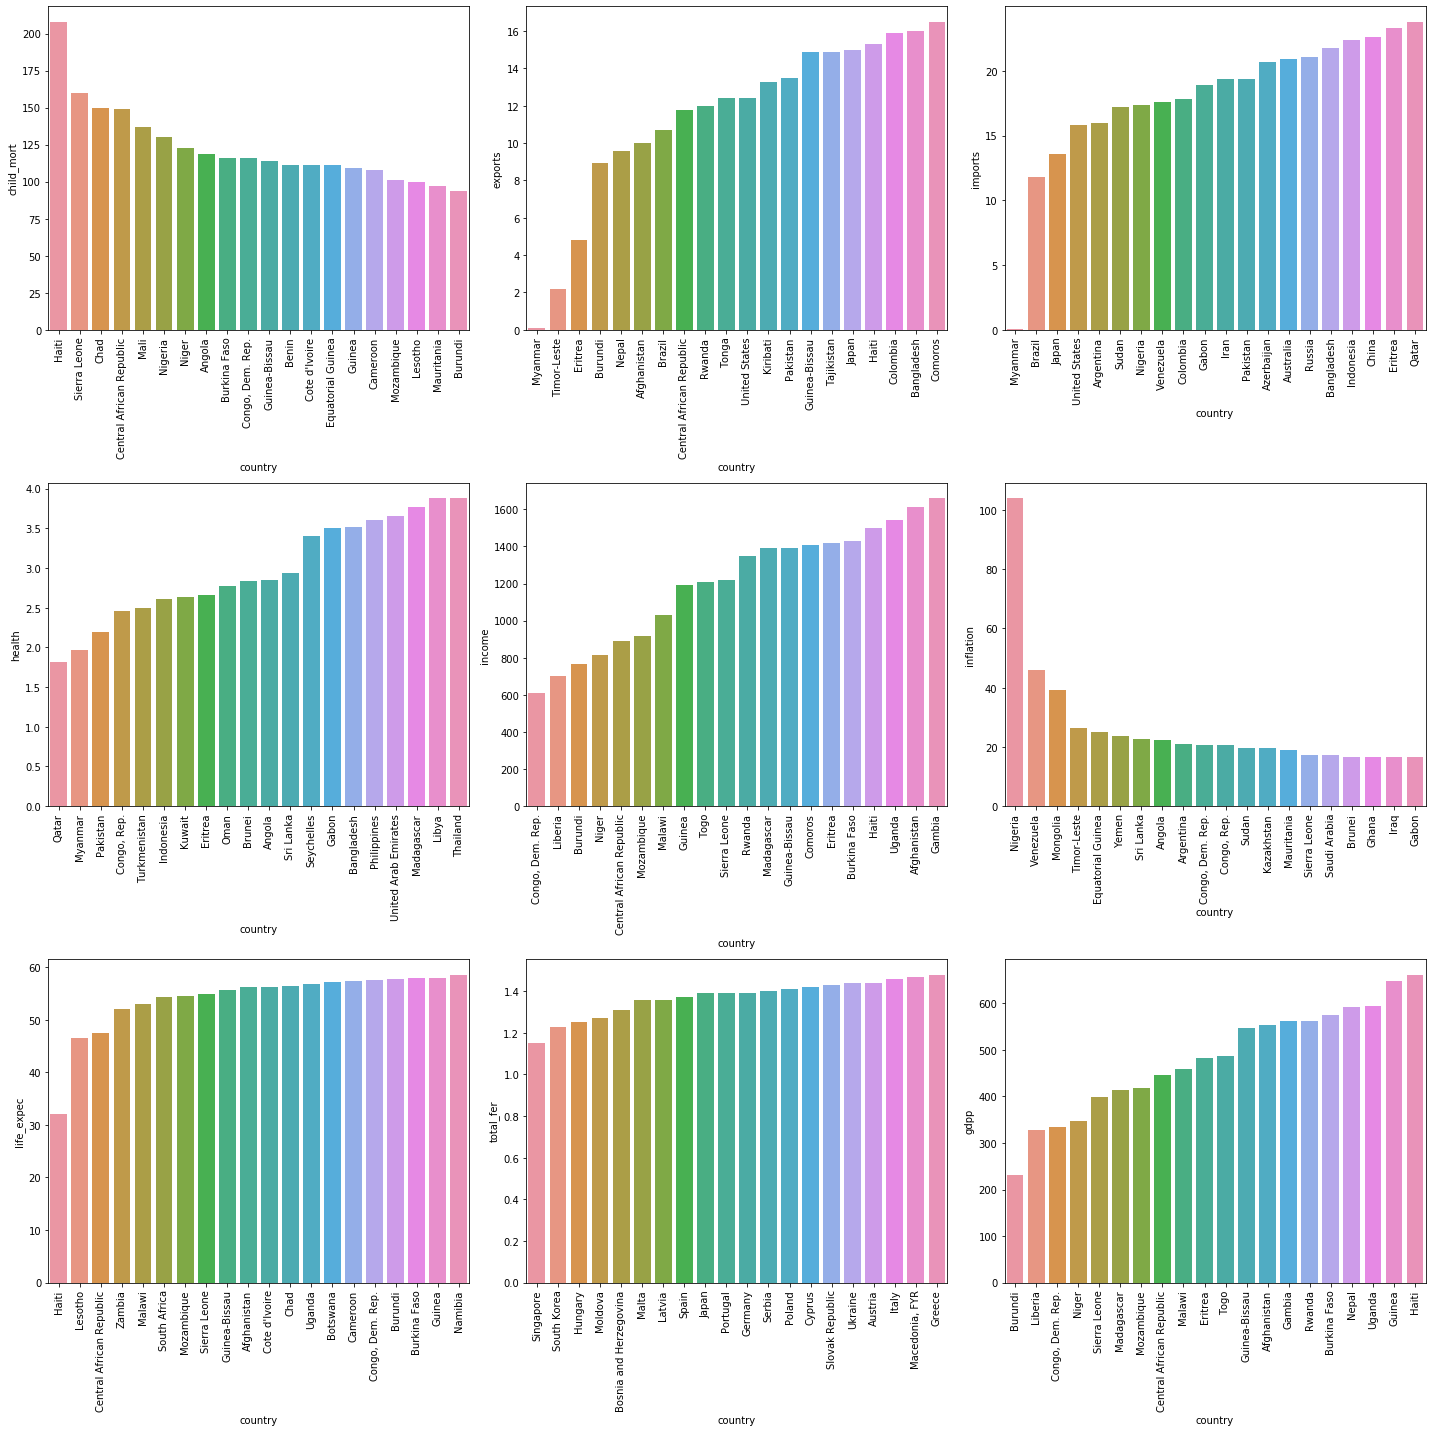

In [9]:
#undertanding country wrt to various parameters
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot(x = 'country', y = 'child_mort',data = df_country,order=df_country.sort_values('child_mort',ascending=False)[:20].country)
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.barplot(x = 'country', y = 'exports', data = df_country,order=df_country.sort_values('exports')[:20].country)
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.barplot(x = 'country', y = 'imports', data = df_country,order=df_country.sort_values('imports')[:20].country)
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.barplot(x = 'country', y = 'health', data = df_country,order=df_country.sort_values('health')[:20].country)
plt.xticks(rotation=90)
plt.subplot(3,3,5)
sns.barplot(x = 'country', y = 'income', data = df_country,order=df_country.sort_values('income')[:20].country)
plt.xticks(rotation=90)
plt.subplot(3,3,6)
sns.barplot(x = 'country', y = 'inflation', data = df_country,order=df_country.sort_values('inflation',ascending=False)[:20].country)
plt.xticks(rotation=90)
plt.subplot(3,3,7)
sns.barplot(x = 'country', y = 'life_expec', data = df_country,order=df_country.sort_values('life_expec')[:20].country)
plt.xticks(rotation=90)
plt.subplot(3,3,8)
sns.barplot(x = 'country', y = 'total_fer', data = df_country,order=df_country.sort_values('total_fer')[:20].country)
plt.xticks(rotation=90)
plt.subplot(3,3,9)
sns.barplot(x = 'country', y = 'gdpp', data = df_country,order=df_country.sort_values('gdpp')[:20].country)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('eda')
plt.show()

#### Inference:
- It is evident that there are variations in the countries wrt to other variables of the data set
- Haiti has the highest child mortality rate among the rest
- Burundi has the lowest gdpp rate among the rest of the countries
- Congo,Dem. Republic has the lowest income rate among the rest of the countries

### Step 4 : Data Visualization

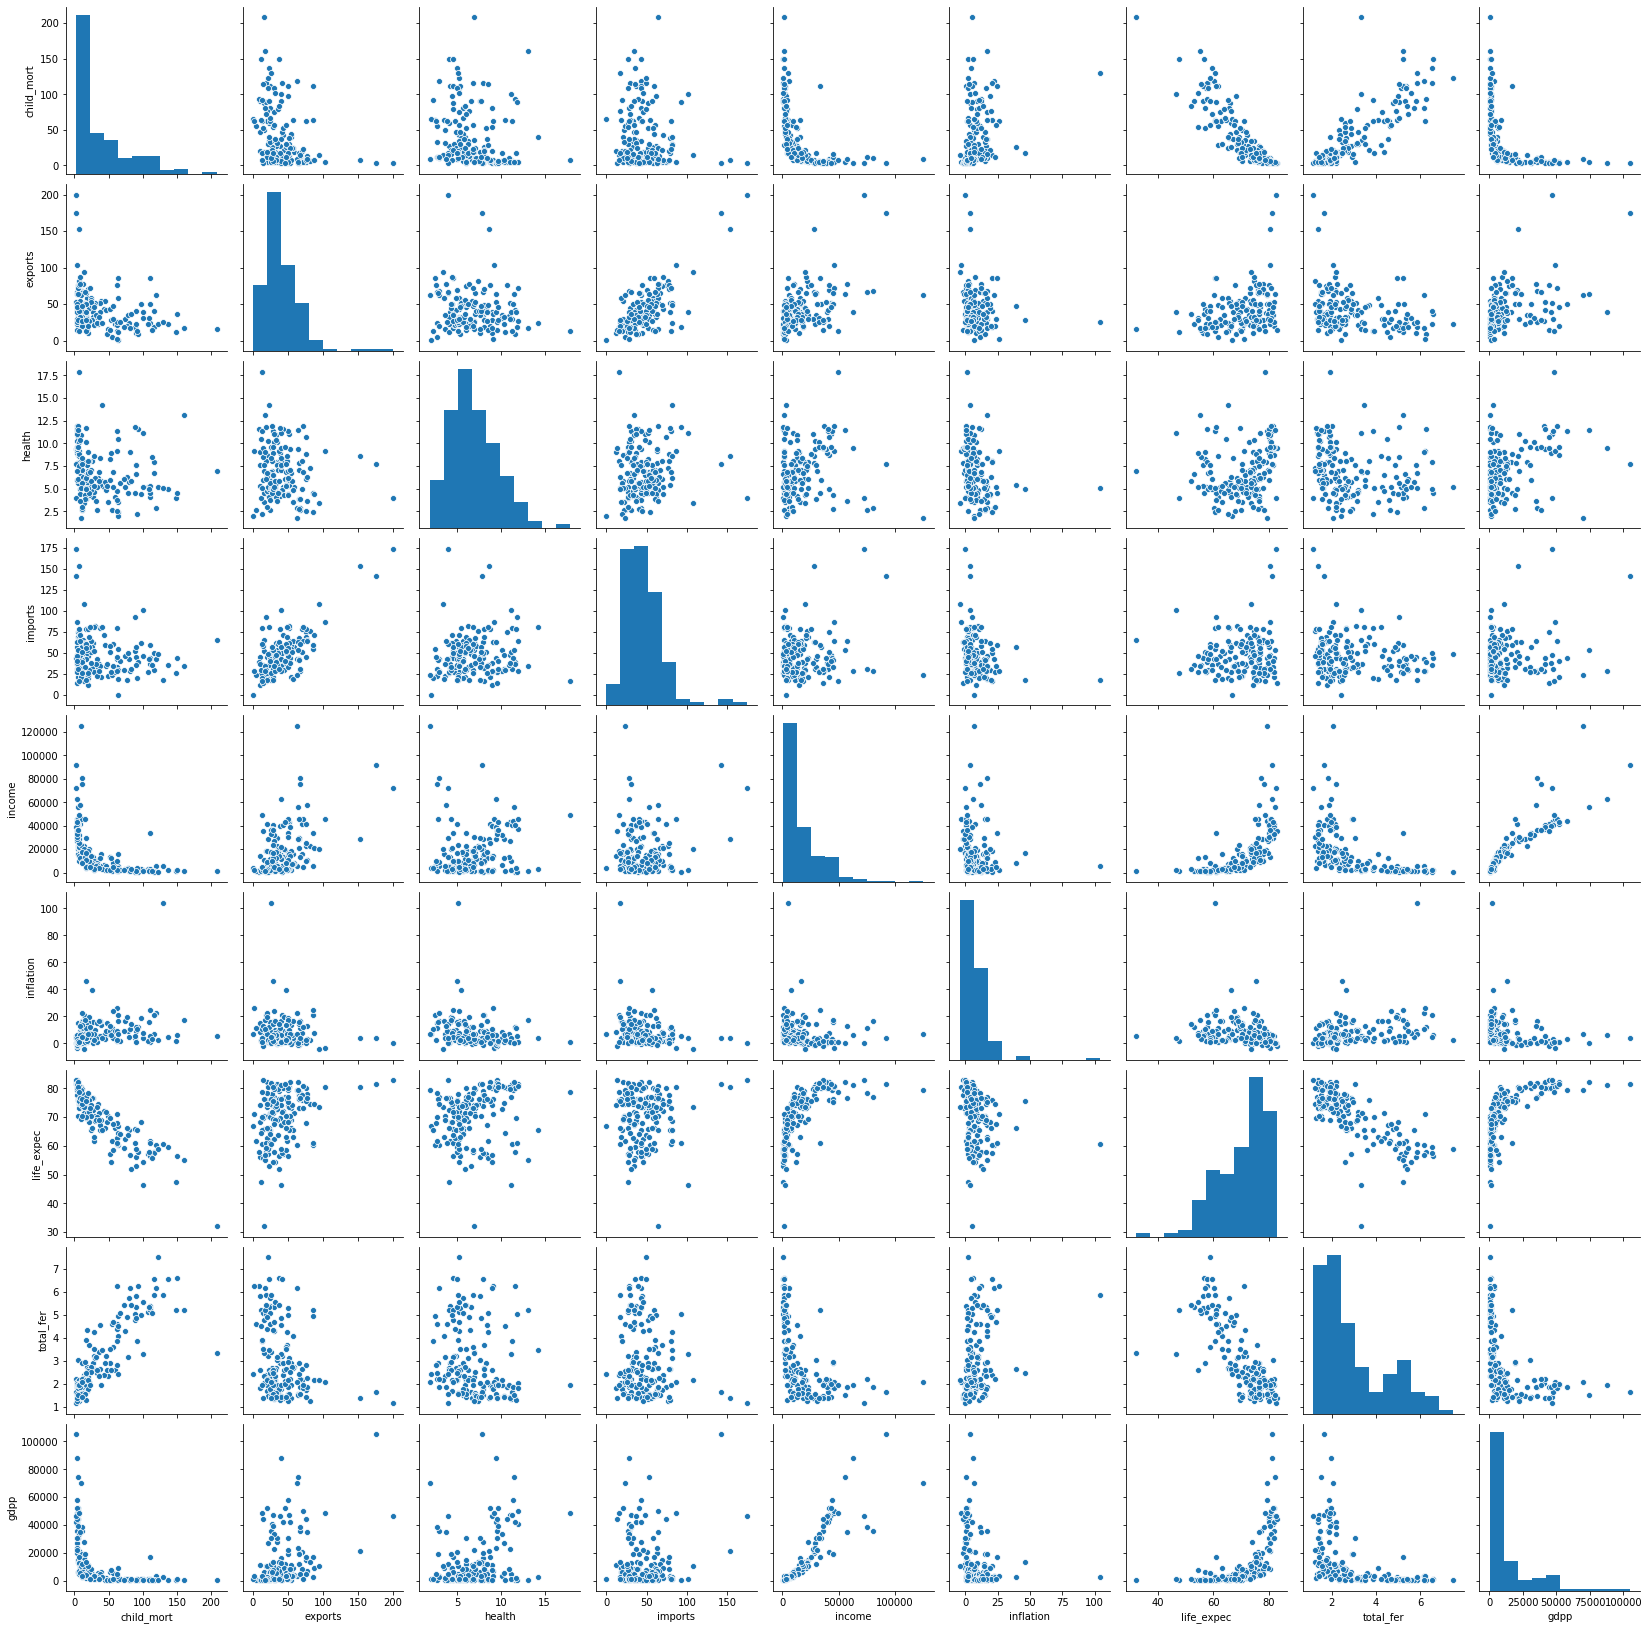

In [10]:
# Pairplot of all numeric columns
sns.pairplot(df_country)
plt.show()

In [11]:
df_country.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


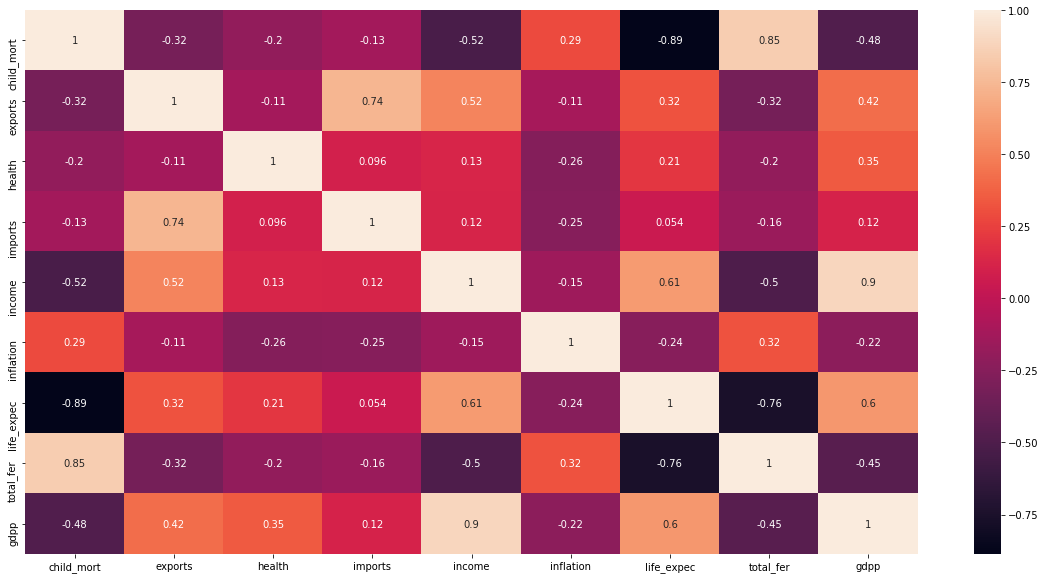

In [12]:
# Heatmap to understand the attributes dependency
plt.figure(figsize = (20,10))        
sns.heatmap(df_country.corr(),annot = True)
plt.show()

#### Inference:
- child_mort and life_expec are highly correlated with correlation of -0.89
- child_mort and total_fer are highly correlated with correlation of 0.85
- imports and exports are highly correlated with correlation of 0.74
- life_expec and total_fer are highly correlated with correlation of -0.76

### Step 5 : Data Preparation and Visualizing Distribution of the data for cluster formation


#### Derived Metrics

In [13]:
#The columns are given in percentage of the gdpp, hence converting them to their actual values.
df_country['exports']=round((df_country['gdpp']*df_country['exports'])/100,2)
df_country['health']=round((df_country['gdpp']*df_country['health'])/100,2)
df_country['imports']=round((df_country['gdpp']*df_country['imports'])/100,2)
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


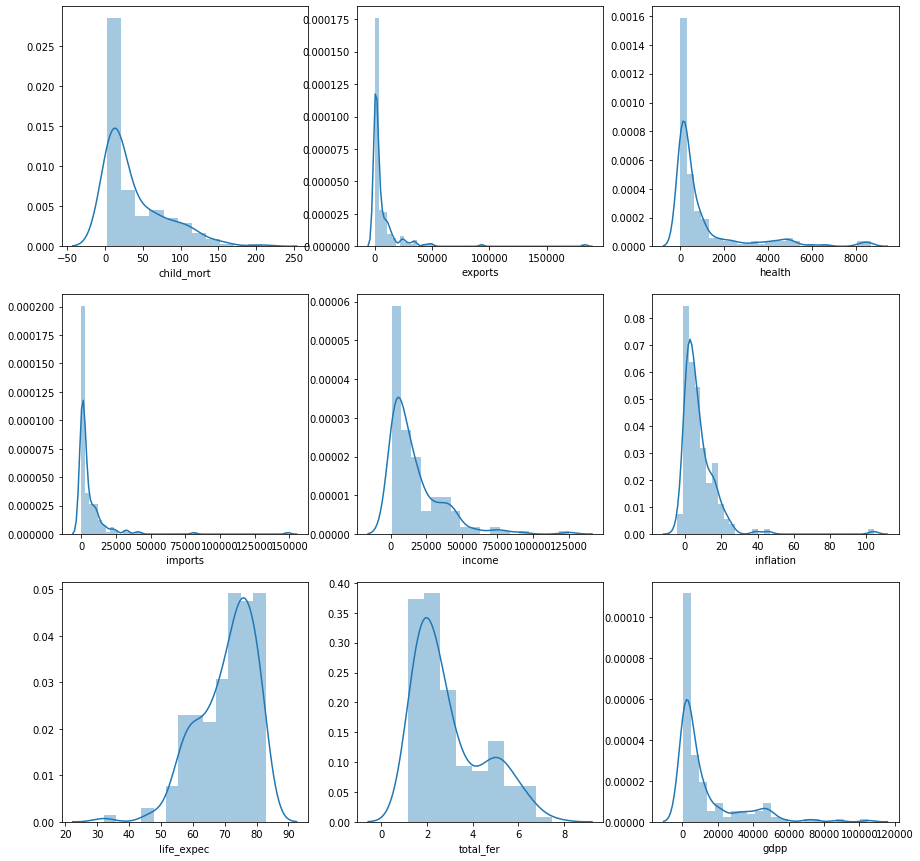

In [14]:
plt.figure(figsize = (15,15))
feature = df_country.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df_country[i[1]])

#### Inference
- few the graphs are not uniformaly spread, however for the assignment we will be choosing : 
- GDP, Income and Chil_mort as the main feature for clustering

### Step 6 : Outlier Treatment

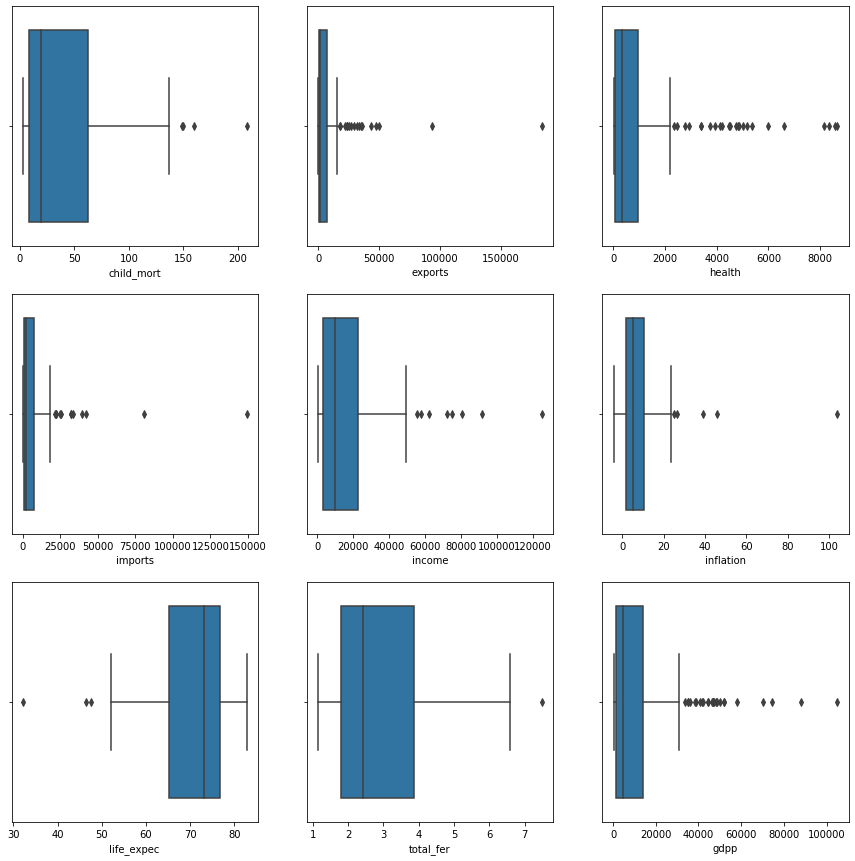

In [15]:
plt.figure(figsize = (15,15))
feature = df_country.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df_country[i[1]])

#### Inference:
- clearly we can see that there are outliers for child_mort,health,gdpp,life_expec,exports,imports,income,inflation
- we will be capping the higher values for the columns income, exports,income,health & gdpp
- we will be capping the lower values for the child_mort, inflation


In [16]:
#Statistical information of the data set before outlier treatment
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [17]:
# Capping (statistical) outliers
# outlier treatment for income
# q1_income = df_country['income'].quantile(0.01)
q4_income = df_country['income'].quantile(0.99)
#df_country["income"] = np.where(df_country["income"] <=q1_income, q1_income,df_country['income'])
df_country["income"] = np.where(df_country["income"] >=q4_income, q4_income,df_country['income'])


# outlier treatment for exports
# q1_exports = df_country['exports'].quantile(0.01)
q4_exports = df_country['exports'].quantile(0.99)
# df_country["exports"] = np.where(df_country["exports"] <=q1_exports, q1_exports,df_country['exports'])
df_country["exports"] = np.where(df_country["exports"] >=q4_exports, q4_exports,df_country['exports'])


# outlier treatment for imports
# q1_imports = df_country['imports'].quantile(0.01)
q4_imports = df_country['imports'].quantile(0.99)
# df_country["imports"] = np.where(df_country["imports"] <=q1_imports, q1_imports,df_country['imports'])
df_country["imports"] = np.where(df_country["imports"] >=q4_imports, q4_imports,df_country['imports'])


# outlier treatment for health
# q1_health = df_country['health'].quantile(0.01)
q4_health = df_country['health'].quantile(0.99)
# df_country["health"] = np.where(df_country["health"] <=q1_health, q1_health,df_country['health'])
df_country["health"] = np.where(df_country["health"] >=q4_health, q4_health,df_country['health'])


# outlier treatment for inflation
q1_inflation = df_country['inflation'].quantile(0.01)
#q4_inflation = df_country['inflation'].quantile(0.99)
df_country["inflation"] = np.where(df_country["inflation"] <=q1_inflation, q1_inflation,df_country['inflation'])
#df_country["inflation"] = np.where(df_country["inflation"] >=q4_inflation, q4_inflation,df_country['inflation'])

# outlier treatment for gdpp
#q1_gdpp = df_country['gdpp'].quantile(0.01)
q4_gdpp = df_country['gdpp'].quantile(0.99)
#df_country["gdpp"] = np.where(df_country["gdpp"] <=q1_gdpp, q1_income,df_country['gdpp'])
df_country["gdpp"] = np.where(df_country["gdpp"] >=q4_gdpp, q4_income,df_country['gdpp'])


# outlier treatment for health
q1_child_mort = df_country['child_mort'].quantile(0.01)
#q4_child_mort = df_country['child_mort'].quantile(0.99)
df_country["child_mort"] = np.where(df_country["child_mort"] <=q1_child_mort, q1_child_mort,df_country['child_mort'])
#df_country["child_mort"] = np.where(df_country["child_mort"] >=q4_child_mort, q1_child_mort,df_country['child_mort'])

#Statistical information of the data set before outlier treatment
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214790,1054.206592,5873.135210,16857.550898,7.798194,70.555689,2.947964,12820.131737
std,40.327869,11415.308582,1790.845357,9422.700877,17957.012855,10.553699,8.893172,1.513848,17680.317684
min,2.800000,1.080000,12.820000,0.650000,609.000000,-2.348800,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,104.000000,82.800000,7.490000,84374.000000


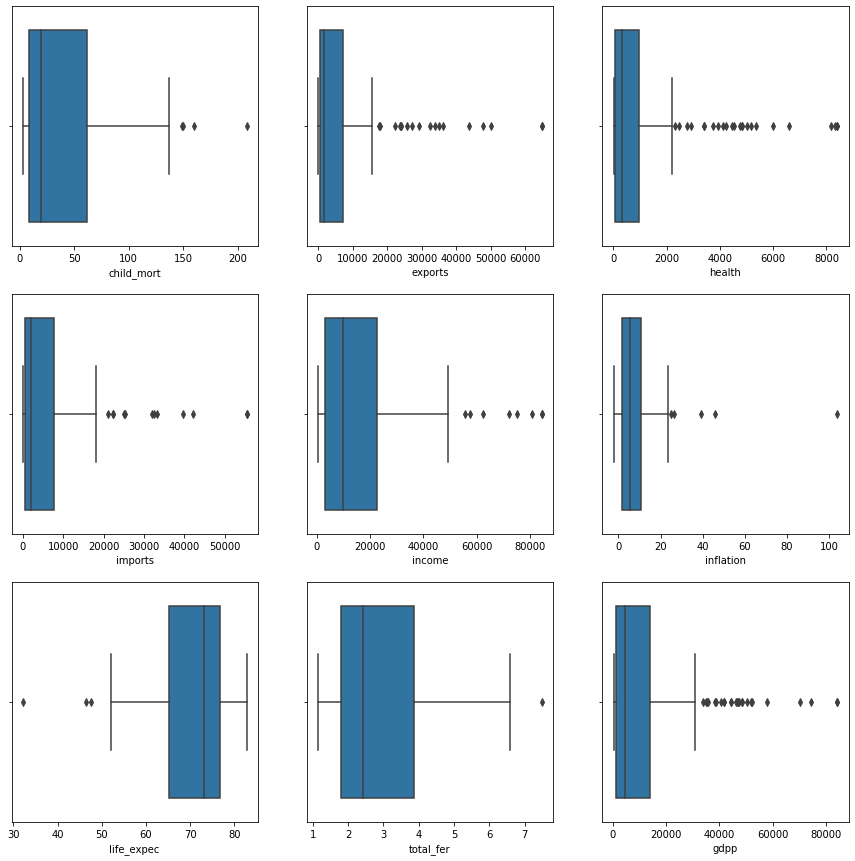

In [18]:
# visualizing variables post capping of the outliers
plt.figure(figsize = (15,15))
feature = df_country .columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df_country[i[1]])

### Clustering

### Step 7 : Hopkins Statistics Test
Check if k-means can be performed using hopkins measure
Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.


In [19]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
hopkins(df_country.drop(['country'],axis=1))

0.9554098876054171

#### Inference:
- Since the Hopkins Score is between (0.7, ..., 0.99). It has a high tendency to cluster.

### Step 8 : Model Building

It is extremely important to rescale the variables so that they have a comparable scale. There are two common ways of rescaling:
1.	Min-Max scaling
2.	Standardisation (mean-0, sigma-1)
Here, we will use Min-Max Scaling.

In [21]:
#use of Standard Scaling Technique for Scaling of the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country.drop(['country'],axis=1))
df_country_scaled

array([[ 1.29153663, -0.56962212, -0.56695631, ..., -1.61909203,
         1.90288227, -0.69591654],
       [-0.53899289, -0.47385792, -0.44039058, ...,  0.64786643,
        -0.85997281, -0.49526191],
       [-0.27286971, -0.42399974, -0.48627192, ...,  0.67042323,
        -0.0384044 , -0.47427174],
       ...,
       [-0.37235501, -0.49160668, -0.54025194, ...,  0.28695762,
        -0.66120626, -0.65297179],
       [ 0.44839871, -0.53995007, -0.55242796, ..., -0.34463279,
         1.14094382, -0.65297179],
       [ 1.11495022, -0.52701632, -0.54227381, ..., -2.09278484,
         1.6246091 , -0.64446227]])

In [22]:
#Converting the Scaled Array to a data frame
df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.columns[1:])
df_country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566956,-0.598740,-0.851668,0.156035,-1.619092,1.902882,-0.695917
1,-0.538993,-0.473858,-0.440391,-0.413584,-0.386946,-0.314406,0.647866,-0.859973,-0.495262
2,-0.272870,-0.424000,-0.486272,-0.476100,-0.221053,0.788991,0.670423,-0.038404,-0.474272
3,2.007831,-0.381249,-0.534091,-0.463973,-0.612045,1.387733,-1.179234,2.128151,-0.527031
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.704258,-0.541946,-0.035180


### Step 9 :  K-Means Clustering: 

**Finding the Optimal Number of Clusters**

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

1. First we initialize k points, called means, randomly.
2. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

#### Silhouette score
$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$
$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

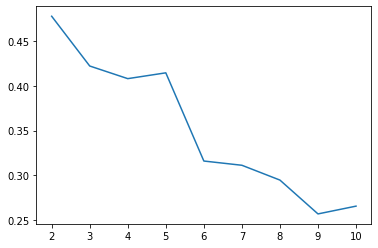

In [23]:
#Silhouette score analysis to find the ideal number of clusters for K-means clustering

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
     kmean = KMeans(n_clusters = k).fit(df_country_scaled)
     ss.append([k, silhouette_score(df_country_scaled, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])
plt.show()



#### Inference:
- From above plot number_of_cluster=4 and number_of_cluster=3 looks like a good value for clustering

In [24]:
clusters_range=[2,3,4,5,6,7,8,9,10,11]                                  # selecting range of clusters
for i in clusters_range:                                                # For loop
    kmeans=KMeans(n_clusters=i,max_iter=500)                            # Using iteration 500 for finding Kmeans
    kmeans.fit(df_country_scaled)                                       # fitting the kmeans
    cluster_label=kmeans.labels_                                        # saving the labels in a cluster_label list
    
    silhouette_Score=silhouette_score(df_country_scaled,cluster_label)        # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,silhouette_Score))

For no. of cluster=2,silhouette score is 0.47801623744233446
For no. of cluster=3,silhouette score is 0.4223323201031291
For no. of cluster=4,silhouette score is 0.4081797098459299
For no. of cluster=5,silhouette score is 0.414685057377112
For no. of cluster=6,silhouette score is 0.31597740998871654
For no. of cluster=7,silhouette score is 0.3016855646920225
For no. of cluster=8,silhouette score is 0.2847839007990732
For no. of cluster=9,silhouette score is 0.3077091905579417
For no. of cluster=10,silhouette score is 0.2581793392433812
For no. of cluster=11,silhouette score is 0.2929958635262065


#### Inference
- A score closer to 1 indicates that the data point is very similar to other data points in the cluster
- As per the business we will choose value of clusters as 3, as 2 clusters will not be a good decision

#### Elbow curve-ssd

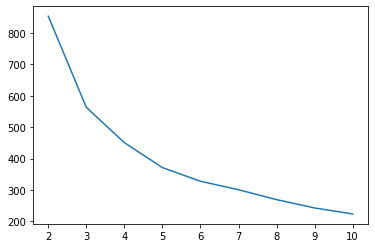

In [25]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df_country_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

#### Inference:

- Looking at the above elbow curve it looks like a good to proceed with either 3 or 4 clusters. we will go ahead with 3 clusters

### KMeans clustering with k=3

In [26]:
# Let's start with Kmeans with K=3
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df_country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [27]:
df_country_kmean = df_country.copy()

In [28]:
label  = pd.DataFrame(kmean.labels_, columns= ['group_labels'])
label.head()

,group_labels
0,2
1,0
2,0
3,2
4,0


In [29]:
df_country_kmean = pd.concat([df_country_kmean, label], axis =1)
df_country_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,0


In [30]:
df_country_kmean.group_labels.value_counts()

0    92
2    48
1    27
Name: group_labels, dtype: int64

#### Inference:
There are good number of countries in each clusters.

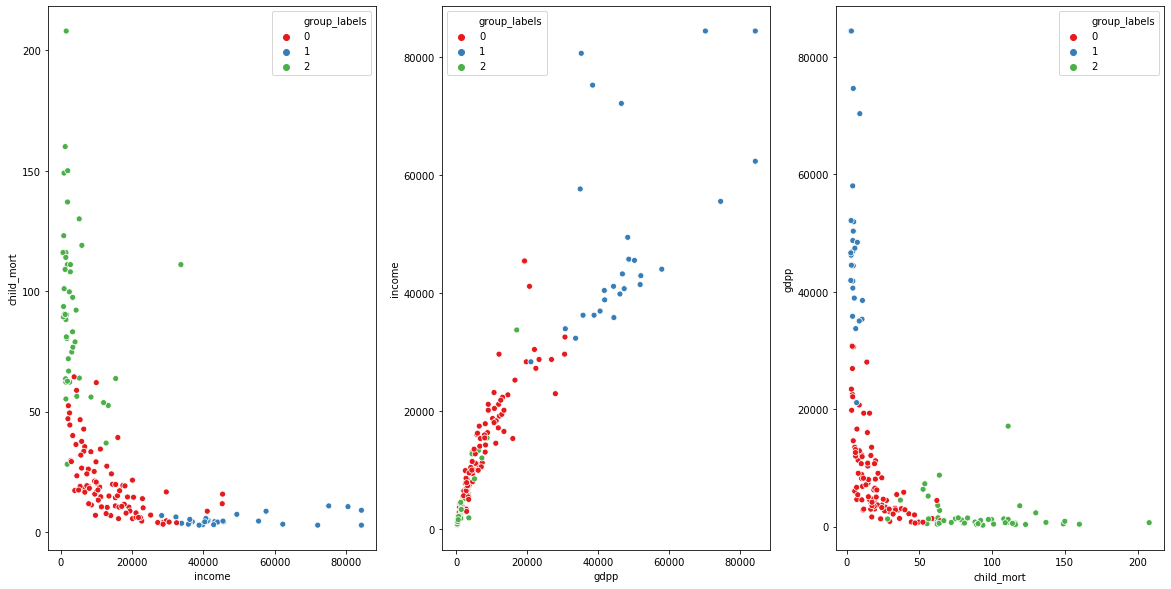

In [31]:
#plotting of the clusters formed using the optimal k value provided by SSD and SS
plt.figure(figsize = (20,10))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='group_labels',data = df_country_kmean,legend='full',palette="Set1")
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='group_labels', data = df_country_kmean,legend='full',palette="Set1")
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='group_labels', data=df_country_kmean,legend='full',palette="Set1")

### Inference:
- We have visualized the data and saw some good clusters were formed 

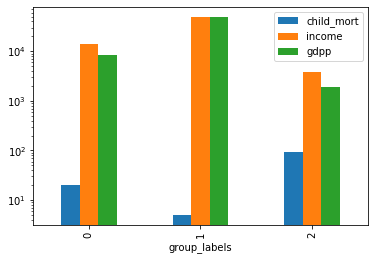

In [32]:
# Making sense out of the clusters
df_country_kmean.drop(['country','exports','imports','inflation','life_expec','total_fer','health'], axis = 1).groupby('group_labels').mean().plot(kind = 'bar')
plt.yscale('log')
plt.show()

### Inference:

- Cluster 2 is having the highest Child Mortality followed by cluster 0 and cluster 1
- Cluster 2 is having the lowest income followed by cluster 0 and cluster
- Cluster 2 is having the lowest gdpp followed by cluster 0 and cluster 1


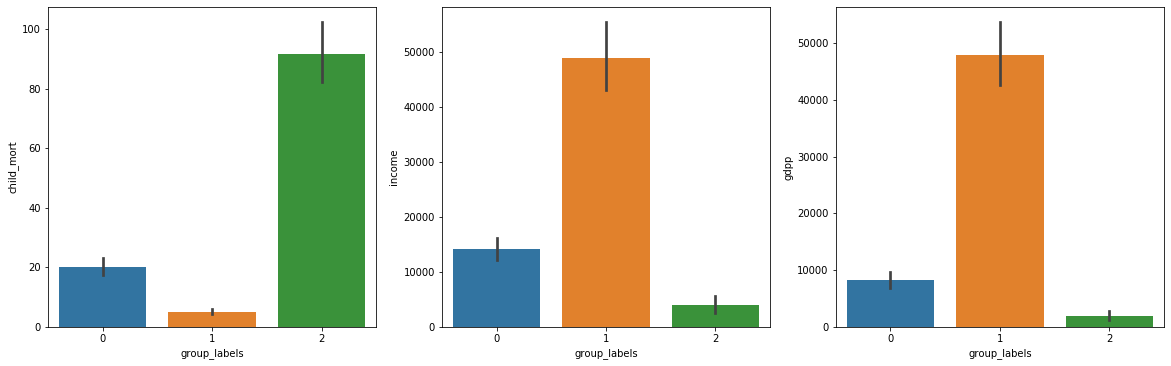

In [33]:
# Visualizing the clusters formed with the three variables using bar plots
plt.figure(figsize = (20,20))
feature = ['child_mort','income','gdpp']
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.barplot(y=df_country_kmean[i[1]],x='group_labels',data=df_country_kmean)

### Inference:
- Cluster 2 is having the highest Child Mortality followed by cluster 0, cluster 1 respectively
- Cluster 2 is having the lowest income followed by cluster 0, cluster 1 respectively
- Cluster 2 is having the lowest gdpp followed by cluster 0, cluster 1 respectively

In [34]:
# Filtering of cluster '0' formed
df_country_kmean[df_country_kmean['group_labels'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group_labels
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.4900,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.1000,76.5,2.89,4460.0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.4400,76.8,2.13,12200.0,0
5,Argentina,14.5,1946.70,834.30,1648.00,18700.0,20.9000,75.8,2.37,10300.0,0
6,Armenia,18.1,669.76,141.68,1458.66,6700.0,7.7700,73.3,1.69,3220.0,0
9,Azerbaijan,39.2,3171.12,343.39,1208.88,16000.0,13.8000,69.1,1.92,5840.0,0
10,Bahamas,13.8,9800.00,2209.20,12236.00,22900.0,-0.3930,73.8,1.86,28000.0,0
11,Bahrain,8.6,14386.50,1028.79,10536.30,41100.0,7.4400,76.0,2.16,20700.0,0
12,Bangladesh,49.4,121.28,26.68,165.24,2440.0,7.1400,70.4,2.33,758.0,0
13,Barbados,14.2,6320.00,1275.20,7792.00,15300.0,0.3210,76.7,1.78,16000.0,0


In [35]:
# Filtering of cluster '1' formed
df_country_kmean[df_country_kmean['group_labels'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group_labels
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.1600,82.0,1.93,51900.0,1
8,Austria,4.3,24059.70,5159.0000,22418.20,43200.0,0.8730,80.5,1.44,46900.0,1
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.8800,80.0,1.86,44400.0,1
23,Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.7000,77.1,1.84,35300.0,1
29,Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.8700,81.3,1.63,47400.0,1
42,Cyprus,3.6,15461.60,1838.7600,17710.00,33900.0,2.0100,79.9,1.42,30800.0,1
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.2200,79.5,1.87,58000.0,1
53,Finland,3.0,17879.40,4134.9000,17278.80,39800.0,0.3510,80.0,1.87,46200.0,1
54,France,4.2,10880.80,4831.4000,11408.60,36900.0,1.0500,81.4,2.03,40600.0,1
58,Germany,4.2,17681.40,4848.8000,15507.80,40400.0,0.7580,80.1,1.39,41800.0,1


In [36]:
# Filtering of cluster '2' formed
df_country_kmean[df_country_kmean['group_labels'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.40,31.08,281.98,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.60,527.05,3257.55,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.40,38.76,170.20,1430.0,6.810,57.9,5.87,575.0,2
26,Burundi,93.6,20.61,26.80,90.55,764.0,12.300,57.7,6.26,231.0,2
28,Cameroon,108.0,290.82,67.20,353.70,2660.0,1.910,57.3,5.11,1310.0,2
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.010,47.5,5.21,446.0,2
32,Chad,150.0,330.10,40.63,390.20,1930.0,6.390,56.5,6.59,897.0,2
36,Comoros,88.2,126.88,34.68,397.57,1410.0,3.870,65.9,4.75,769.0,2


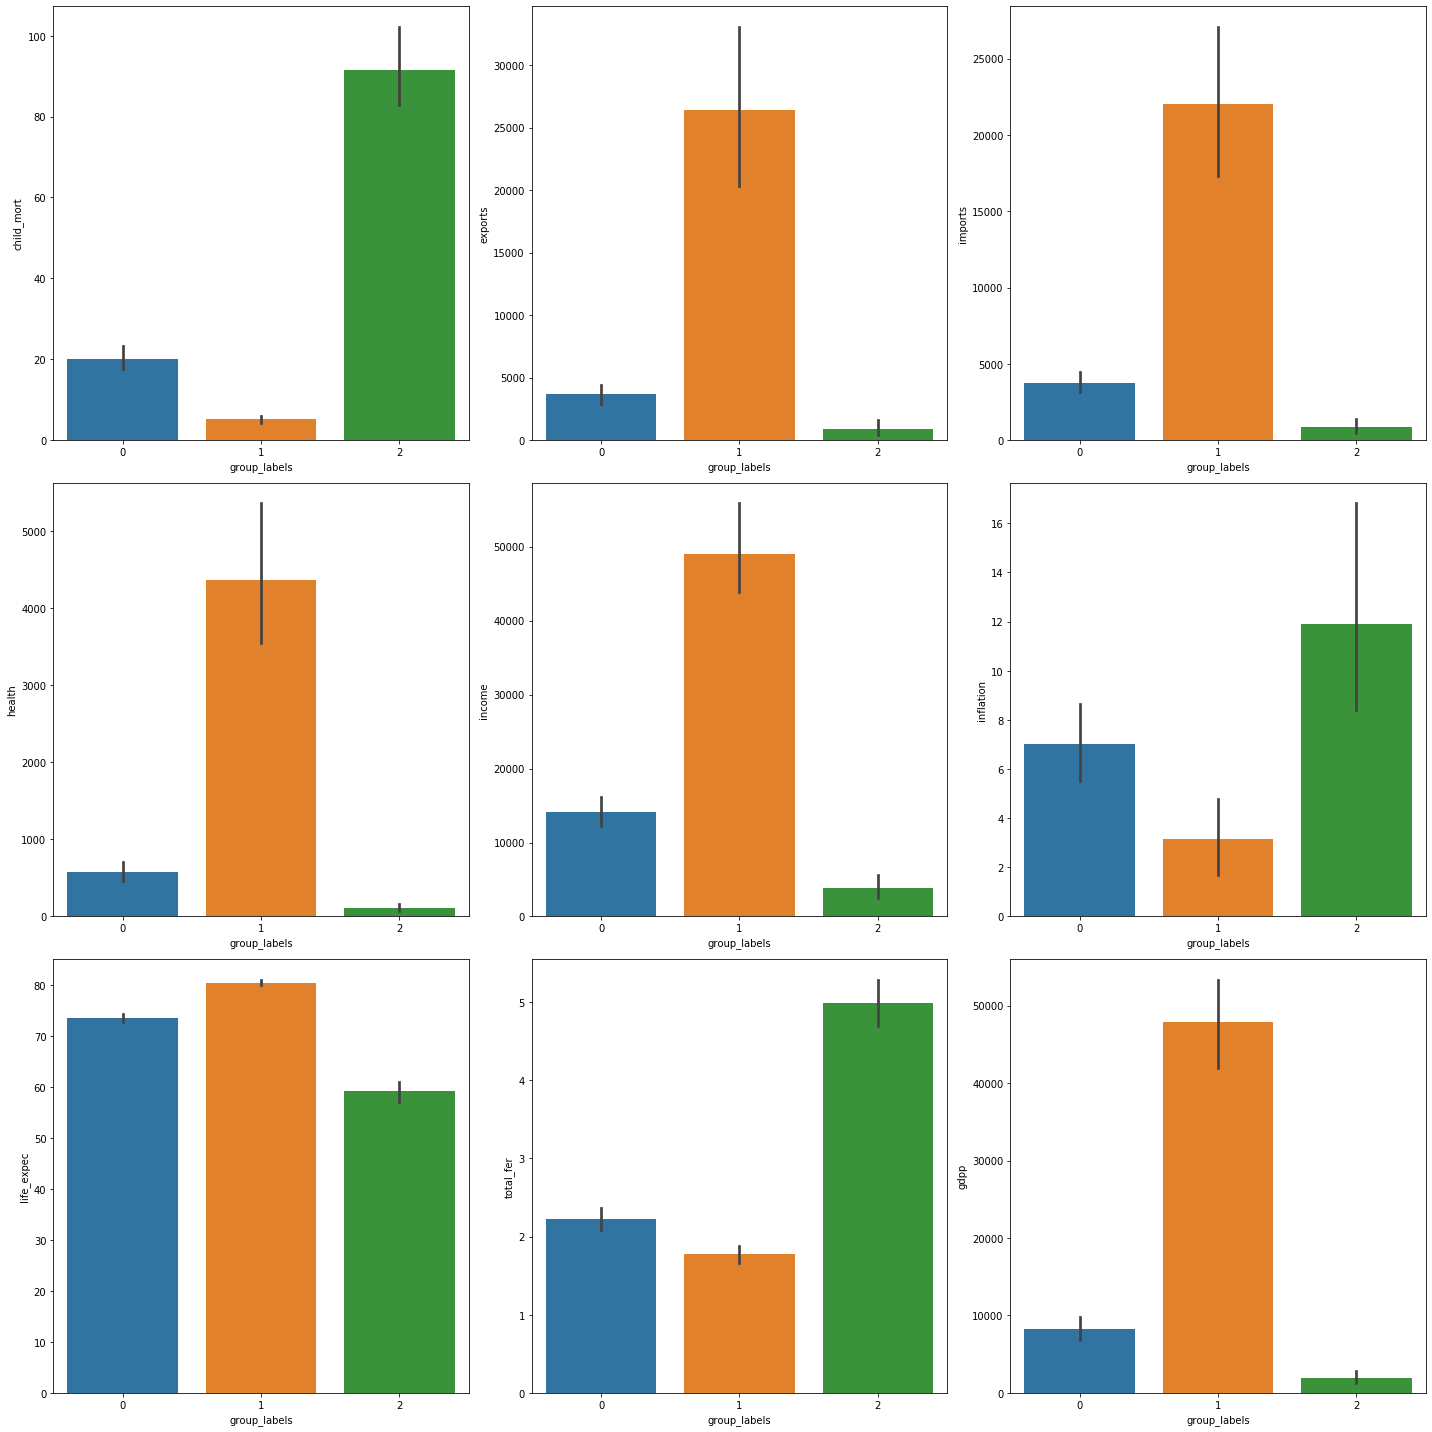

In [37]:
#Plot graphs for different clusters with n_clusters =5
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot(x = 'group_labels', y = 'child_mort',data = df_country_kmean)

plt.subplot(3,3,2)
sns.barplot(x = 'group_labels', y = 'exports', data = df_country_kmean)

plt.subplot(3,3,3)
sns.barplot(x = 'group_labels', y = 'imports', data = df_country_kmean)

plt.subplot(3,3,4)
sns.barplot(x = 'group_labels', y = 'health', data = df_country_kmean)

plt.subplot(3,3,5)
sns.barplot(x = 'group_labels', y = 'income', data = df_country_kmean)

plt.subplot(3,3,6)
sns.barplot(x = 'group_labels', y = 'inflation', data = df_country_kmean)

plt.subplot(3,3,7)
sns.barplot(x = 'group_labels', y = 'life_expec', data = df_country_kmean)

plt.subplot(3,3,8)
sns.barplot(x = 'group_labels', y = 'total_fer', data = df_country_kmean)

plt.subplot(3,3,9)
sns.barplot(x = 'group_labels', y = 'gdpp', data = df_country_kmean)

plt.tight_layout()
plt.savefig(r"C:\Users\kaash\Downloads\Clustering Technique\kmeansclustering.jpg")
plt.show()

Based on above plots we can recommend cluster 2 countries to NGO because of following reasons: 
- low value of gdpp & income
- high value of child_mort and total_fer 
- Life_expec is low in these contries as compared to other countries 
- Also Inflation is high in these contries as compared to other countries
- Exports,imports & health is low in these countries.


In [38]:
# Filtering of cluster formed which is of our requirement high child mortality, low income and low gdpp
df_country_kmean[df_country_kmean['group_labels'] == 2].sort_values(by = ['child_mort','income','gdpp'], ascending = [False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,group_labels
66,Haiti,208.0,101.29,45.74,428.31,1500.0,5.45,32.1,3.33,662.0,2
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399.0,2
32,Chad,150.0,330.10,40.63,390.20,1930.0,6.39,56.5,6.59,897.0,2
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.21,446.0,2
97,Mali,137.0,161.42,35.26,248.51,1870.0,4.37,59.5,6.55,708.0,2


In [39]:
# Filtering of top 5 countries formed which is in dire requirement high child mortality, low income and low gdpp
country=df_country_kmean[df_country_kmean['group_labels'] == 2].sort_values(by = ['child_mort','income','gdpp'], 
                                                                            ascending = [False,True,True]).head(5).country

In [40]:
country=pd.DataFrame(country)
country

,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali


In [41]:
df_country_kmean.to_csv(r'C:\Users\kaash\Downloads\Clustering Technique\Country.csv')

### Hierarchical Clustering

In [42]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [43]:
#looking for the scaled data set
df_country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566956,-0.598740,-0.851668,0.156035,-1.619092,1.902882,-0.695917
1,-0.538993,-0.473858,-0.440391,-0.413584,-0.386946,-0.314406,0.647866,-0.859973,-0.495262
2,-0.272870,-0.424000,-0.486272,-0.476100,-0.221053,0.788991,0.670423,-0.038404,-0.474272
3,2.007831,-0.381249,-0.534091,-0.463973,-0.612045,1.387733,-1.179234,2.128151,-0.527031
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.704258,-0.541946,-0.035180


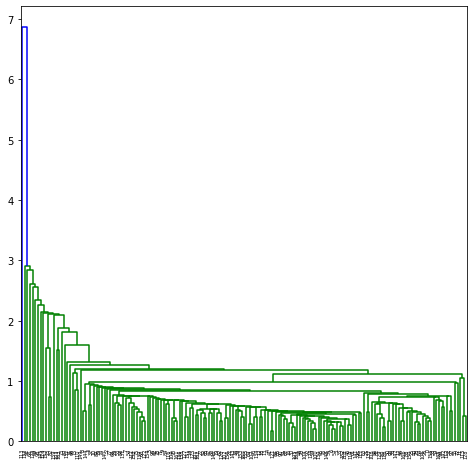

In [44]:
# performing single linkage on scaled data set
plt.figure(figsize=(8, 8))
mergings = linkage(df_country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

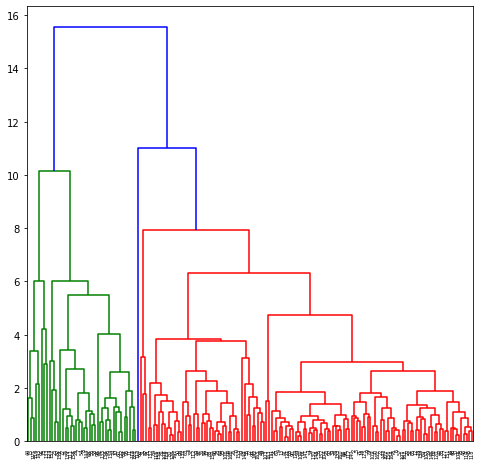

In [45]:
# performing complete linkage on scaled data set
plt.figure(figsize=(8, 8))
mergings = linkage(df_country_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [46]:
# Formation of the clusters using Dendrogram
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# assign cluster labels to the original data set
df_country['cluster_labels'] = cluster_labels
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,0


In [48]:
#getting the counts of countries in each cluster
df_country['cluster_labels'].value_counts()

0    125
1     41
2      1
Name: cluster_labels, dtype: int64

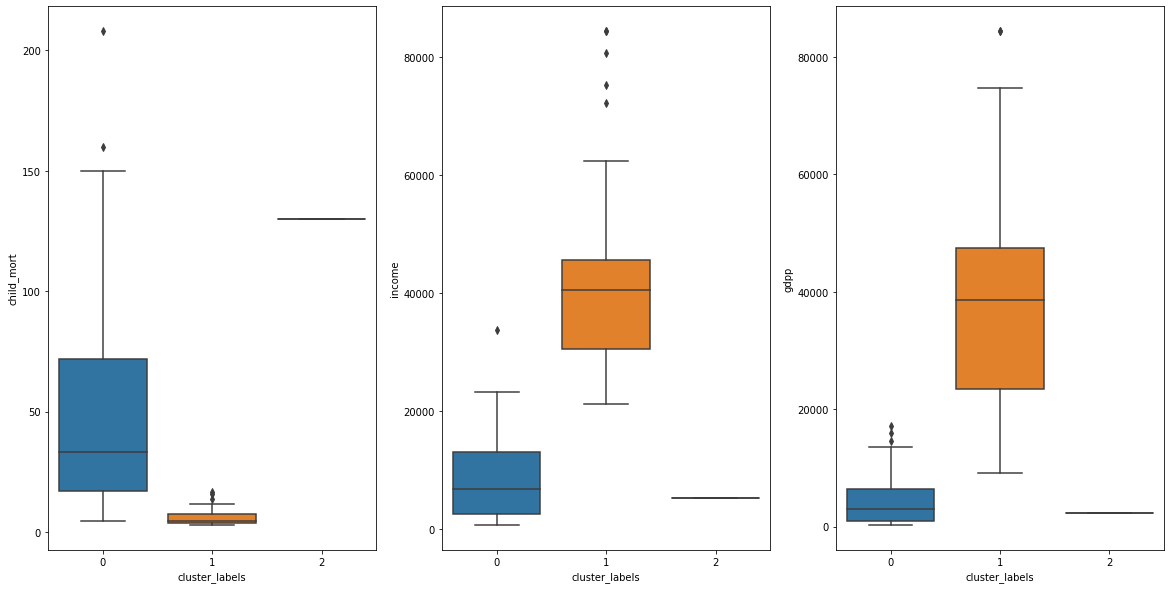

In [49]:
# Visualizing the 3 cluster formed based on the three important parameters
plt.figure(figsize = (20,10))
ax1 = plt.subplot(1, 3, 1)
sns.boxplot(x = 'cluster_labels', y = 'child_mort', data = df_country)
ax2 = plt.subplot(1, 3, 2)
sns.boxplot(x = 'cluster_labels', y = 'income', data = df_country)
ax3 = plt.subplot(1, 3, 3)
sns.boxplot(x = 'cluster_labels', y = 'gdpp', data=df_country)
plt.show()

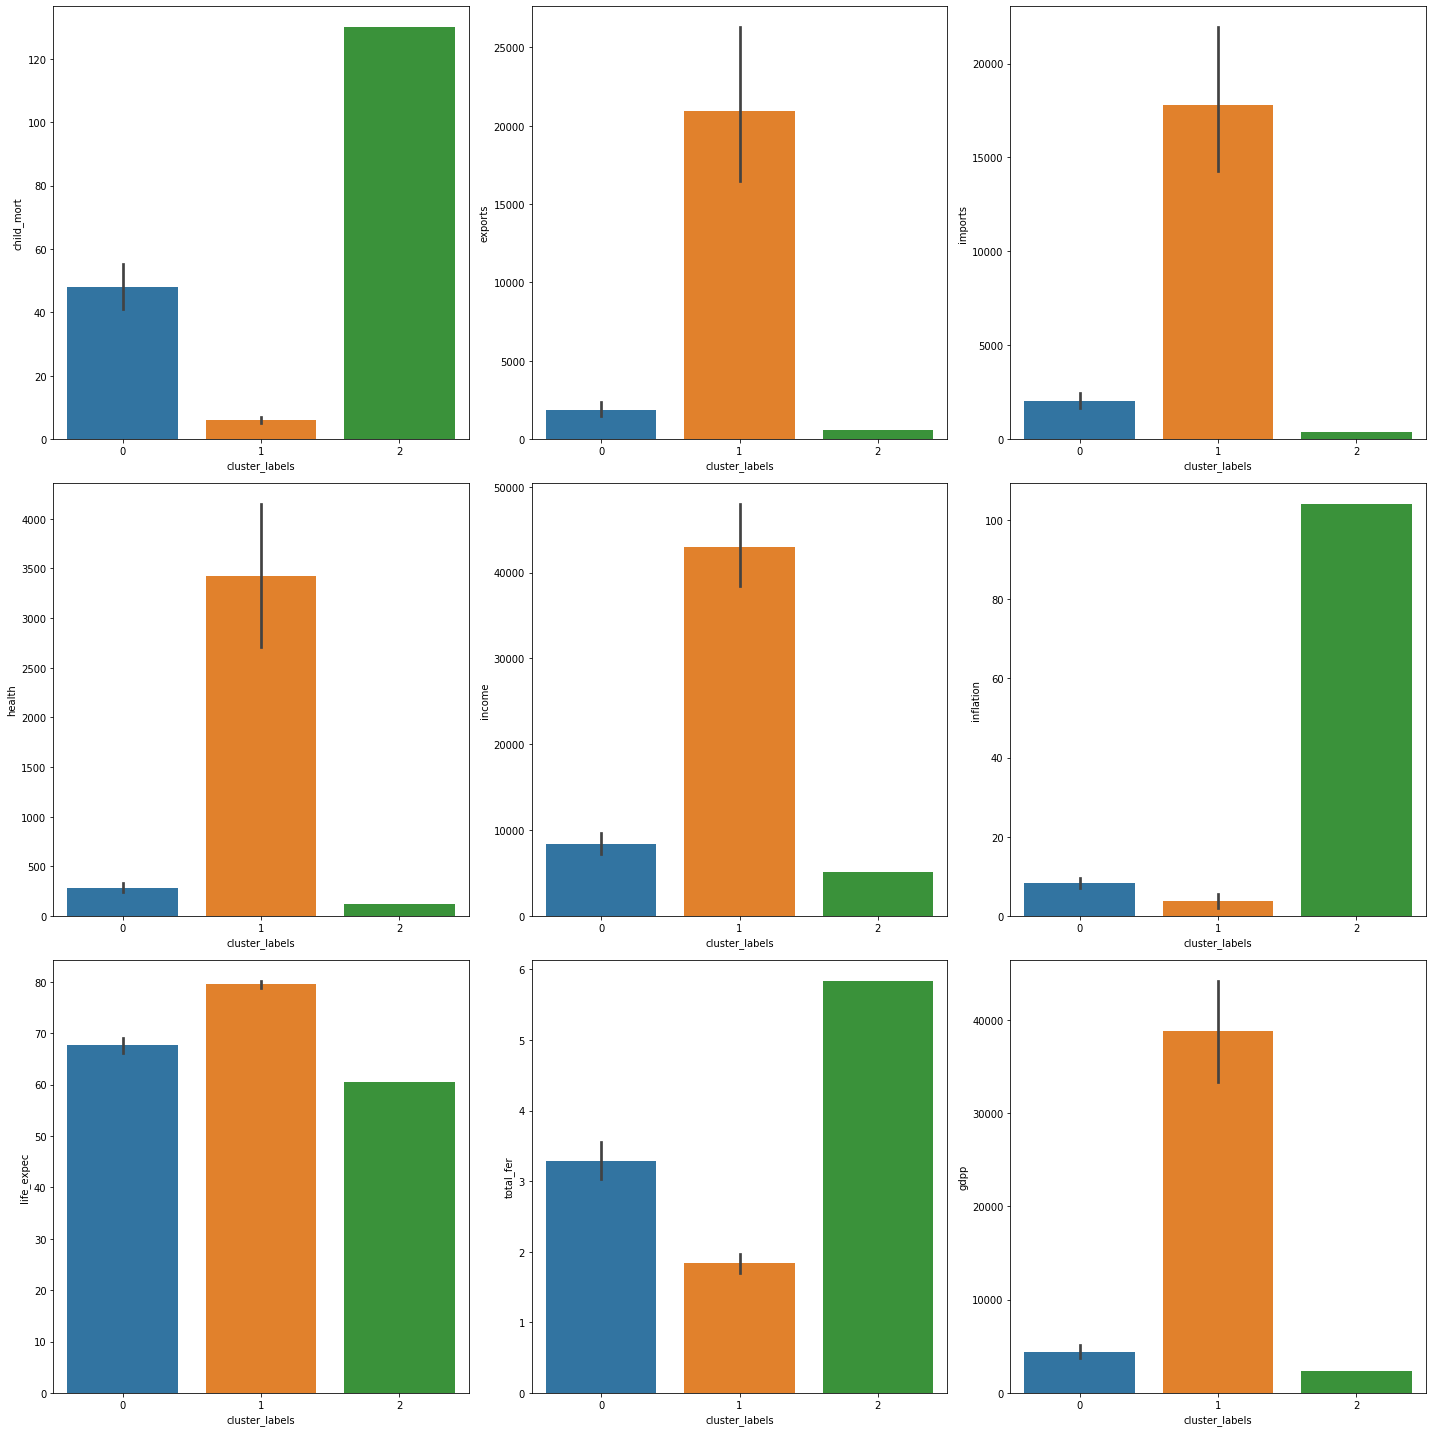

In [50]:
#Plot graphs for different clusters with n_clusters =3
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot(x = 'cluster_labels', y = 'child_mort',data = df_country)

plt.subplot(3,3,2)
sns.barplot(x = 'cluster_labels', y = 'exports', data = df_country)

plt.subplot(3,3,3)
sns.barplot(x = 'cluster_labels', y = 'imports', data = df_country)

plt.subplot(3,3,4)
sns.barplot(x = 'cluster_labels', y = 'health', data = df_country)

plt.subplot(3,3,5)
sns.barplot(x = 'cluster_labels', y = 'income', data = df_country)

plt.subplot(3,3,6)
sns.barplot(x = 'cluster_labels', y = 'inflation', data = df_country)

plt.subplot(3,3,7)
sns.barplot(x = 'cluster_labels', y = 'life_expec', data = df_country)

plt.subplot(3,3,8)
sns.barplot(x = 'cluster_labels', y = 'total_fer', data = df_country)

plt.subplot(3,3,9)
sns.barplot(x = 'cluster_labels', y = 'gdpp', data = df_country)

plt.tight_layout()
plt.savefig(r"C:\Users\kaash\Downloads\Clustering Technique\hierarchicalclustering.jpg")
plt.show()

Based on above plots we can recommend cluster 0 countries to NGO because of following reasons: 
- low value of gdpp & income
- high value of child_mort and total_fer 
- Life_expec is low in these contries as compared to other countries 
- Also Inflation is high in these contries as compared to other countries
- Exports,imports & health is low in these countries.

In [51]:
#top 5 countries which require the help from HELP International
country=df_country[df_country['cluster_labels'] == 0].sort_values(by = ['child_mort','income','gdpp'], ascending = [False,True,True]).head(5).country
country=pd.DataFrame(country)
country

,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali



### Conclusion
From all the three clusters, we select the top 5 countries which are common across all clusters, which match the criteria 
- Socio-Economic factors: GDPP,Income 
- Health Factors: Child Mortality 